In [37]:
import os
import openai
from openai import OpenAI
import pandas as pd
import matplotlib.pyplot as plt

import importlib
import LauryHolt

importlib.reload(LauryHolt)  # Reloads the module to get your updated function

from LauryHolt import laurylottery  # Re-imports the updated function

import random
import numpy as np


client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

niter = 150

# Names
names = pd.read_csv("Surnames.csv")
surnames = names[["Last Name"]]


# Ages
younger_ages = np.round(np.random.normal(loc = 31.9, scale = 4.7, size = niter))
older_ages = np.round(np.random.normal(loc = 71.2, scale = 8.4, size = niter))

player1 = random.sample(range(453), niter)
#player2s = random.sample(range(453), numprompts)


title1 = np.random.choice([0, 1], size = niter, replace=True)
#title2s = np.random.choice([0, 1], size=numprompts, replace=True)
titles = ["Mr.", "Ms."]

payouts = pd.read_csv("Laury-Holt-Payouts.csv")

# Probability Processing 
payouts['AProbability1'] = payouts['AProbability1'].apply(lambda x: f"{int(x*100)}%")
payouts['AProbability2'] = payouts['AProbability2'].apply(lambda x: f"{int(x*100)}%")
payouts['BProbability1'] = payouts['BProbability1'].apply(lambda x: f"{int(x*100)}%")
payouts['BProbability2'] = payouts['BProbability2'].apply(lambda x: f"{int(x*100)}%")
payouts['APayout1'] = "$" + (payouts['APayout1']).astype(str) + ".00"
payouts['APayout2'] = "$" + (payouts['APayout2']).astype(str) + ".00"
payouts['BPayout1'] = "$" + (payouts['BPayout1']).astype(str) + "0"
payouts['BPayout2'] = "$" + (payouts['BPayout2']).astype(str) + ".00"

# Switching "A" and "B" labels to confuse chat
formatted_df = pd.DataFrame()
formatted_df["Choice"] = payouts["Round"]
formatted_df["Option A"] = payouts["AProbability1"] + " chance of winning " + payouts["APayout1"] + ", " + payouts["AProbability2"] + " chance of winning " + payouts["APayout2"]
formatted_df["Option B"] = payouts["BProbability1"] + " chance of winning " + payouts["BPayout1"] + ", " + payouts["BProbability2"] + " chance of winning " + payouts["BPayout2"]

payouts = payouts.drop(columns=["ExpectedPayoutA", "ExpectedPayoutB", "RelativePayoutA"])

In [ ]:
younger_responses = []

for i in range(0, niter):

    response = laurylottery(client = client, player1 = surnames.loc[player1[i], "Last Name"], title1 = titles[title1[i]], 
                            payoutmatrix = formatted_df, age = younger_ages[i])
    younger_responses.append(response)


numbers = list(map(int, younger_responses))
younger_numbers_array = np.array(numbers)
rates = []

for i in range(1,11):

    rates.append(np.sum(younger_numbers_array >= i))

younger_array = np.array(rates)
print(younger_array)
younger_rates_array = younger_array/niter
print(younger_rates_array)



[147 146 145 144 106  26  24  23  22  13]
[0.98       0.97333333 0.96666667 0.96       0.70666667 0.17333333
 0.16       0.15333333 0.14666667 0.08666667]


In [ ]:
older_responses = []

for i in range(0, niter):

    older_response = laurylottery(client = client, player1 = surnames.loc[player1[i], "Last Name"], title1 = titles[title1[i]], 
                            payoutmatrix = formatted_df, age = older_ages[i])
    older_responses.append(older_response)


numbers = list(map(int, older_responses))
older_numbers_array = np.array(numbers)
print(numbers)
rates = []

for i in range(1,11):

    rates.append(np.sum(older_numbers_array >= i))

older_array = np.array(rates)
print(older_array)
older_rates_array = older_array/niter
print(older_rates_array)


[5, 9, 6, 9, 4, 3, 4, 4, 10, 10, 5, 9, 5, 4, 6, 5, 9, 9, 4, 10, 5, 10, 5, 5, 5, 4, 10, 5, 5, 5, 5, 6, 9, 0, 5, 5, 4, 4, 10, 0, 5, 10, 5, 10, 10, 5, 1, 5, 5, 5, 5, 10, 5, 5, 5, 10, 9, 5, 5, 5, 5, 5, 4, 4, 10, 4, 9, 5, 5, 5, 5, 1, 0, 10, 10, 5, 4, 10, 10, 4, 4, 4, 5, 5, 5, 5, 5, 4, 5, 10, 5, 5, 5, 5, 5, 4, 10, 5, 5, 0, 9, 5, 9, 9, 5, 0, 5, 10, 5, 5, 5, 5, 9, 5, 5, 9, 9, 0, 5, 9, 4, 5, 10, 0, 4, 10, 4, 5, 9, 10, 9, 9, 4, 5, 0, 10, 5, 5, 5, 10, 4, 10, 4, 9, 5, 10, 0, 5, 5, 10]
[141 139 139 138 115  49  46  46  46  27]
[0.94       0.92666667 0.92666667 0.92       0.76666667 0.32666667
 0.30666667 0.30666667 0.30666667 0.18      ]


In [40]:
from scipy.stats import mannwhitneyu
from collections import Counter


younger_digit_counts = []
print(younger_array[0])
younger_digit_counts.append(niter - younger_array[0])
for i in range(1,(younger_array).shape[0]):
    younger_digit_counts.append(younger_array[i-1]-younger_array[i])
younger_digit_counts.append(younger_array[9])
print(younger_digit_counts)

older_digit_counts = []
print(older_array[0])
older_digit_counts.append(niter - older_array[0])
for i in range(1,(older_array).shape[0]):
    older_digit_counts.append(older_array[i-1]-older_array[i])
older_digit_counts.append(older_array[9])
print(older_digit_counts)

stat, p = mannwhitneyu(younger_digit_counts, older_digit_counts, alternative='two-sided')

print(f"U statistic: {stat}")
print(f"P-value: {p}")

print("Average # of Safe Choices, younger group")
print(np.sum(younger_array)/niter)

print("Average # of Safe Choices, older group")
print(np.sum(older_array)/niter)

147
[3, 1, 1, 1, 38, 80, 2, 1, 1, 9, 13]
141
[9, 2, 0, 1, 23, 66, 3, 0, 0, 19, 27]
U statistic: 62.0
P-value: 0.9470133731976282
Average # of Safe Choices, younger group
5.306666666666667
Average # of Safe Choices, younger group
5.906666666666666


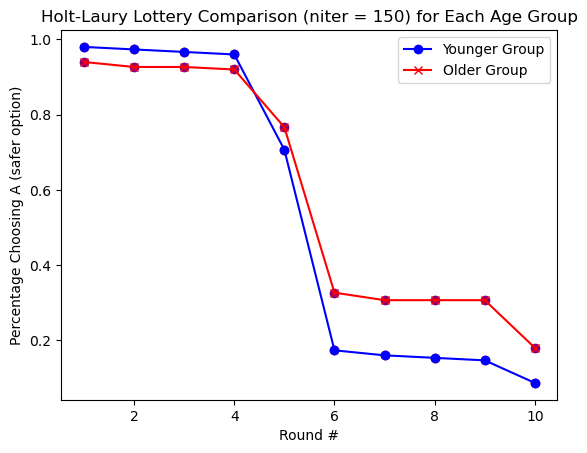

In [39]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.scatter(x, younger_rates_array, color='red')
plt.plot(x, younger_rates_array, color='blue', linestyle='-', marker='o', label='Younger Group')

# Second line (older group)
plt.scatter(x, older_rates_array, color='purple')
plt.plot(x, older_rates_array, color='red', linestyle='-', marker='x', label='Older Group')

# Add labels and legend
plt.xlabel('Round #')
plt.ylabel('Percentage Choosing A (safer option)')
plt.title('Holt-Laury Lottery Comparison (niter = ' + str(niter) + ") for Each Age Group")
plt.legend()

plt.show()

In [56]:
import LauryHoltCorrect  
importlib.reload(LauryHoltCorrect)
from LauryHoltCorrect import laurylotterycorrect

nuetral_responses = []

for i in range(0, 50):

    response = laurylotterycorrect(client = client, player1 = surnames.loc[player1[i], "Last Name"], title1 = titles[title1[i]], 
                            payoutmatrix = formatted_df)
    nuetral_responses.append(response)


numbers = list(map(int, nuetral_responses))
nuetral_numbers_array = np.array(numbers)
rates = []

for i in range(1,11):

    rates.append(np.sum(nuetral_numbers_array >= i))

nuetral_array = np.array(rates)
print(nuetral_array)
nuetral_rates_array = nuetral_array/50
print(nuetral_rates_array)


[48 48 48 46 35 11  9  9  9  5]
[0.96 0.96 0.96 0.92 0.7  0.22 0.18 0.18 0.18 0.1 ]


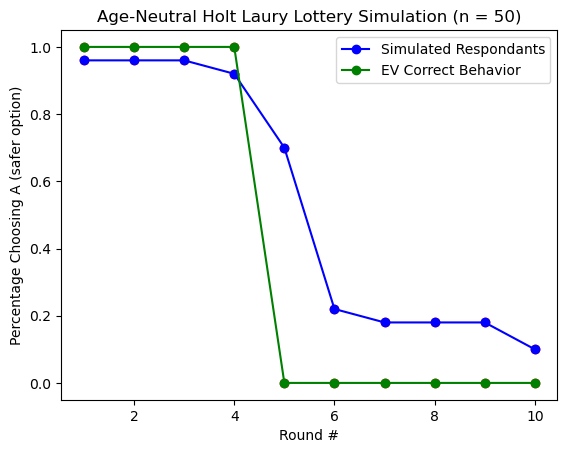

In [61]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.scatter(x, nuetral_rates_array, color='red')
plt.plot(x, nuetral_rates_array, color='blue', linestyle='-', marker='o', label='Simulated Respondants')

ideal_rates = [1,1,1,1,0,0,0,0,0,0]
plt.scatter(x, ideal_rates, color='red')
plt.plot(x, ideal_rates, color='green', linestyle='-', marker='o', label='EV Correct Behavior')

# Add labels and legend
plt.xlabel('Round #')
plt.ylabel('Percentage Choosing A (safer option)')
plt.title("Age-Neutral Holt Laury Lottery Simulation (n = 50)")
plt.legend()

plt.show()

In [58]:
print("Average # of Safe Choices, nuetral group")
print(np.sum(nuetral_array)/50)

Average # of Safe Choices, nuetral group
5.36
